In [71]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
trades=pd.read_csv("historical_data.csv")
sentiment=pd.read_csv("fear_greed_index.csv")

In [24]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [23]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [14]:
trades.shape

(211224, 16)

In [15]:
sentiment.shape

(2644, 4)

In [ ]:
# Checking if there is any Null values or not

In [17]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [18]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [19]:
# there is no null values

In [20]:
# Now,Check for duplicate values
trades.duplicated().sum()

0

In [21]:
sentiment.duplicated().sum()

0

In [22]:
# No duplicate values

In [27]:
# In trades there is a column Timestamp which is not looks alike a time or date
trades['datetime']=pd.to_datetime(trades['Timestamp'],unit="ms")
trades['date']=trades['datetime'].dt.date

In [28]:
trades['date']

0         2024-10-27
1         2024-10-27
2         2024-10-27
3         2024-10-27
4         2024-10-27
             ...    
211219    2025-06-15
211220    2025-06-15
211221    2025-06-15
211222    2025-06-15
211223    2025-06-15
Name: date, Length: 211224, dtype: object

In [30]:
trades[['Timestamp','datetime','date']].head()

,Timestamp,datetime,date
0,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [32]:
# now prepare sentiment date column
sentiment['date']=pd.to_datetime(sentiment['date']).dt.date
sentiment['date']

0       2018-02-01
1       2018-02-02
2       2018-02-03
3       2018-02-04
4       2018-02-05
           ...    
2639    2025-04-28
2640    2025-04-29
2641    2025-04-30
2642    2025-05-01
2643    2025-05-02
Name: date, Length: 2644, dtype: object

In [34]:
sentiment=sentiment[['date','classification']]

In [35]:
sentiment

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear
...,...,...
2639,2025-04-28,Neutral
2640,2025-04-29,Greed
2641,2025-04-30,Greed
2642,2025-05-01,Neutral


In [36]:
# Now, merge both the table or data using date column
data=trades.merge(sentiment,on="date",how="left")
data

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,datetime,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-06-15 15:06:40,2025-06-15,NaN
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-06-15 15:06:40,2025-06-15,NaN
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-06-15 15:06:40,2025-06-15,NaN
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-06-15 15:06:40,2025-06-15,NaN


In [41]:
daily=data.groupby(['Account','date','classification']).agg(
    daily_pnl=('Closed PnL',"sum"),
    trades=('Closed PnL','count'),
    win_rate=('Closed PnL',lambda x:(x>0).mean()),
    avg_trade_size=("Size USD","mean"),
    long_ratio=('Direction',lambda x: (x=='Buy').mean())
    ).reset_index()

In [43]:
daily.head()

,Account,date,classification,daily_pnl,trades,win_rate,avg_trade_size,long_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,Greed,-3.275059e+05,462,0.025974,14810.891818,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,Fear,1.927736e+06,3356,0.405542,16345.241940,0.000000
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,Greed,2.060745e+04,320,0.531250,2492.749906,0.412500
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,Fear,1.709873e+04,3533,0.435041,1693.351684,0.340787
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,Neutral,-1.000000e+00,5,0.000000,6070.200000,0.000000


In [54]:
# Performance vs sentiment
daily.groupby('classification')[['daily_pnl','win_rate',"trades"]].mean().sort_values(by=["win_rate"],ascending=False)

,daily_pnl,win_rate,trades
classification,,,
Fear,209372.662205,0.415878,4183.46875
Greed,99675.516731,0.374074,1134.03125
Extreme Greed,35393.098355,0.336609,1392.40000
Neutral,19842.797260,0.260683,892.62500


# Fear has high win rate and daily PnL,
# Neutral has low win rate and daily PnL



In [58]:
daily.groupby('classification')[['avg_trade_size',"long_ratio"]].mean().sort_values(by="avg_trade_size")

,avg_trade_size,long_ratio
classification,,
Neutral,3793.444161,0.152501
Extreme Greed,4344.447836,0.200000
Greed,5839.310974,0.186593
Fear,5926.522723,0.082953


# Neutral has high Average Trade Size and Fear has Lowest

In [61]:
daily['activity']=pd.qcut(daily['trades'],2,labels=['low','high'])
daily.head()

,Account,date,classification,daily_pnl,trades,win_rate,avg_trade_size,long_ratio,activity
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,Greed,-3.275059e+05,462,0.025974,14810.891818,0.000000,low
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,Fear,1.927736e+06,3356,0.405542,16345.241940,0.000000,high
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,Greed,2.060745e+04,320,0.531250,2492.749906,0.412500,low
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,Fear,1.709873e+04,3533,0.435041,1693.351684,0.340787,high
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,Neutral,-1.000000e+00,5,0.000000,6070.200000,0.000000,low


In [63]:
daily['consistency']=pd.qcut(daily['win_rate'],2,labels=['low','high'])
daily.head()

,Account,date,classification,daily_pnl,trades,win_rate,avg_trade_size,long_ratio,activity,consistency
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,Greed,-3.275059e+05,462,0.025974,14810.891818,0.000000,low,low
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,Fear,1.927736e+06,3356,0.405542,16345.241940,0.000000,high,high
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,Greed,2.060745e+04,320,0.531250,2492.749906,0.412500,low,high
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,Fear,1.709873e+04,3533,0.435041,1693.351684,0.340787,high,high
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,Neutral,-1.000000e+00,5,0.000000,6070.200000,0.000000,low,low


In [78]:
daily.groupby(['consistency','classification'])['win_rate'].mean()

consistency  classification
low          Extreme Greed     0.214743
             Fear              0.312863
             Greed             0.135018
             Neutral           0.161951
high         Extreme Greed     0.824071
             Fear              0.486363
             Greed             0.585006
             Neutral           0.951807
Name: win_rate, dtype: float64

In [88]:
summary=(daily.groupby(['consistency','classification'],as_index=False)['win_rate'].mean())

In [89]:
pivot=summary.pivot(
    index="classification",
    columns="consistency",
    values='win_rate'
)

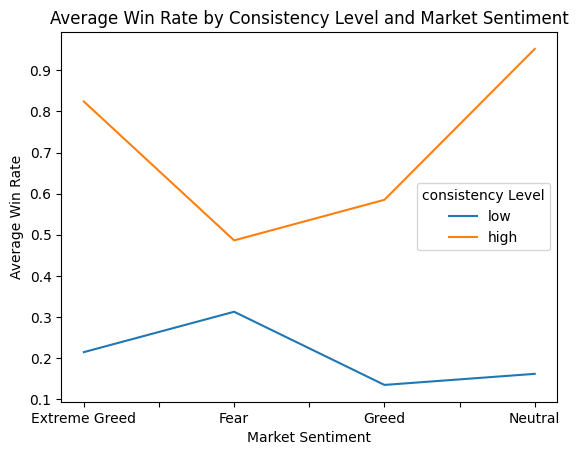

In [90]:
pivot.plot()
plt.title("Average Win Rate by Consistency Level and Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Win Rate")
plt.legend(title="consistency Level")
plt.show()

# Those who have high consistency and Neutral has high win rate and those who have low consistency but have fear has high win rate


In [68]:
daily.groupby(['activity','classification'])['win_rate'].mean()

activity  classification
low       Extreme Greed     0.213394
          Fear              0.412178
          Greed             0.342823
          Neutral           0.243695
high      Extreme Greed     0.521431
          Fear              0.417112
          Greed             0.453940
          Neutral           0.288997
Name: win_rate, dtype: float64

In [86]:
summary2 = (
    daily
    .groupby(['activity', 'classification'], as_index=False)
    ['win_rate']
    .mean()
)

In [87]:
pivot=summary2.pivot(
    index='classification',
    columns='activity',
    values='win_rate'
)

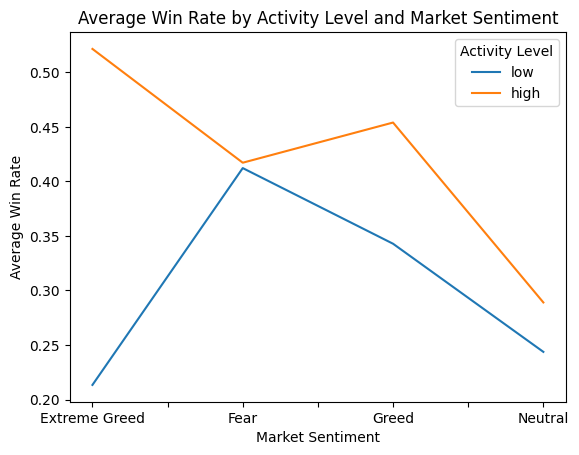

In [77]:
pivot.plot()
plt.title("Average Win Rate by Activity Level and Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Win Rate")
plt.legend(title="Activity Level")
plt.show()

# Those who are in high activity and Extreme Greed have high win rate,
# but those who have low activity and fear have high win rate

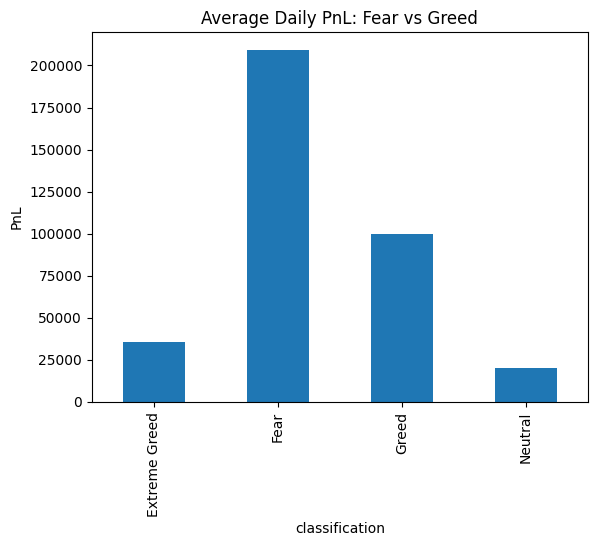

In [72]:
daily.groupby("classification")["daily_pnl"].mean().plot(kind="bar")
plt.title("Average Daily PnL: Fear vs Greed")
plt.ylabel("PnL")
plt.show()

# Conclusion:-
during fear days trade less frequently and reduce leverage and during greed days increase activity